In [1]:
import os
from matrix_client.api import MatrixHttpApi
import matplotlib.pyplot as plt
import pandas as pd

from matrixstats import get_all_events, get_rooms_in_community, filter_events_by_messages
from matrixstats import print_sorted_len, print_sorted_value

In [2]:
with open(".matrix_token") as f:
    token = str(f.read()).strip()

homeserver = "https://matrix.cadair.com"

api = MatrixHttpApi(homeserver, token=token)

In [3]:
ids = get_rooms_in_community(api, "+astropy:openastronomy.org")
ids['sunpy'] = '!MeRdFpEonLoCwhoHeT:matrix.org'

In [4]:
# Get all the messages in all the rooms
events = get_all_events(api, ids, cache="astropy_messages.h5", refresh_cache=False)

# Pop out this chat as it's old and full of freenode spam
_ = events.pop("astropy_irc_and_gitter")
# Pop out this one as it has no messages in it
_ = events.pop("astropy_workshops")

# Filter by actual messages
messages = filter_events_by_messages(events)

all_ap_messages = pd.concat({k:v for k, v in messages.items() if 'astropy' in k}.values())

In [5]:
print_sorted_len(messages)

sunpy: 49375
astropy_general: 3809
astropy_pkg_infrastructure: 1388
astropy_ci_issues: 1191
astropy_random: 939
astropy_astropy_bot: 491
astropy_releasing: 460
astropy_astroquery: 347
astropy_meeting2018_logistics: 315
astropy_coordinates: 271
astropy_fits: 161
astropy_leaveslack: 105
astropy_meeting2018_social: 86
astropy_table: 81
astropy_performance: 80
astropy_affiliated_imexam: 79
astropy_regions: 67
astropy_wcs_ape: 58
astropy_units: 52
astropy_learn: 51
astropy_affiliated_general: 50
astropy_matrix_test: 41
astropy_cssi_nsf_grant: 35
astropy_modeling: 34
astropy_wcs: 33
astropy_paper_ii: 27
astropy_spectroscopy: 21
astropy_ihateconda: 20
astropy_jobs: 19
astropy_astroquery_paper: 16
astropy_gsoc: 8
astropy_git: 3
astropy_ginga: 1
astropy_web_pages: 1
astropy_halotools: 0
astropy_usage_stat: 0
astropy_utils: 0


In [6]:
channel_creation = {k:v.index[-1] for k, v in events.items()}

print_sorted_value(channel_creation, reverse=False)

sunpy: 2016-09-30 04:59:56.951000
astropy_general: 2017-10-09 06:43:25.195000
astropy_pkg_infrastructure: 2018-02-22 04:49:41.385000
astropy_affiliated_general: 2018-05-15 05:39:07.269000
astropy_astropy_bot: 2018-05-15 05:39:09.553000
astropy_astroquery: 2018-05-15 05:39:40.092000
astropy_astroquery_paper: 2018-05-15 05:39:49.056000
astropy_ci_issues: 2018-05-15 05:40:02.322000
astropy_coordinates: 2018-05-15 05:40:27.315000
astropy_cssi_nsf_grant: 2018-05-15 05:40:52.317000
astropy_fits: 2018-05-15 05:41:17.321000
astropy_git: 2018-05-15 05:42:03.017000
astropy_gsoc: 2018-05-15 05:42:27.316000
astropy_halotools: 2018-05-15 05:42:52.315000
astropy_jobs: 2018-05-15 05:43:42.315000
astropy_learn: 2018-05-15 05:44:07.316000
astropy_leaveslack: 2018-05-15 05:44:37.314000
astropy_matrix_test: 2018-05-15 05:45:02.316000
astropy_paper_ii: 2018-05-15 05:45:30.456000
astropy_performance: 2018-05-15 05:45:52.317000
astropy_random: 2018-05-15 05:46:42.312000
astropy_regions: 2018-05-15 05:47:07.

In [7]:
messages_per_day = {k:m['body'].resample("1D", how="count") for k,m in messages.items()}
messages_per_week = {k:m['body'].resample("1W", how="count") for k,m in messages.items()}
mean_mpd = {k:v.mean() for k,v in messages_per_day.items() if len(v)}

ap_mpd = {k:v for k, v in messages_per_day.items() if 'astropy' in k}
total_ap_mpd = pd.concat(ap_mpd.values())

/opt/miniconda/envs/matrix/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':
/opt/miniconda/envs/matrix/lib/python3.7/site-packages/ipykernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  from ipykernel import kernelapp as app


## Total Messages per Day

Text(0.5, 0, 'Date')

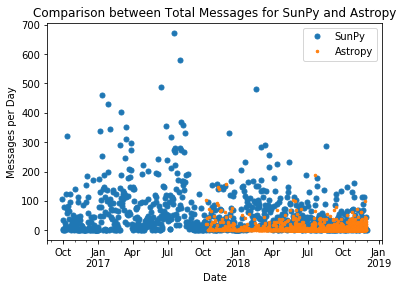

In [8]:
fig, ax = plt.subplots()

ax.set_title("Comparison between Total Messages for SunPy and Astropy")
messages_per_day['sunpy'].plot(ax=ax, label="SunPy", style=".", ms=10)
total_ap_mpd.plot(ax=ax, label="Astropy", style=".", ms=5)
plt.legend()

ax.set_ylabel("Messages per Day")
ax.set_xlabel("Date")


## Senders per Day

In [9]:
for m in messages.values():
    m.loc[:,'usender'] = [a.split(":")[0][1:].split("_")[-1] if "slack" in a else a for a in m['sender']]

/opt/miniconda/envs/matrix/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/miniconda/envs/matrix/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
senders_per_day = {k: m.resample("1D").agg({'usender': 'nunique'})['usender'] for k, m in messages.items() if not m.empty}
ap_spd = {k:v for k, v in senders_per_day.items() if 'astropy' in k}
total_ap_spd = pd.concat(ap_spd.values())

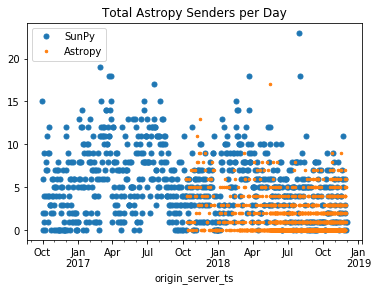

In [11]:
fig, ax = plt.subplots()
ax.set_title("Total Astropy Senders per Day")

senders_per_day['sunpy'].plot(ax=ax, label="SunPy", style=".", ms=10)
total_ap_spd.plot(ax=ax, label="Astropy", style=".", ms=5)

plt.legend()

## Messages per Day vs Senders per Day

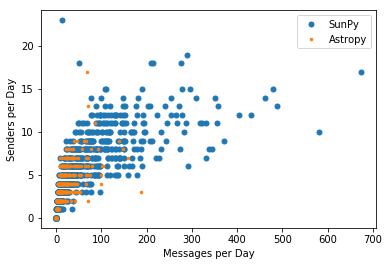

In [12]:
plt.plot(messages_per_day['sunpy'], senders_per_day['sunpy'], ".", label="SunPy", ms=10)
plt.plot(total_ap_mpd, total_ap_spd, ".", label="Astropy", ms=5)
plt.xlabel("Messages per Day")
plt.ylabel("Senders per Day")
plt.legend()